## Goal of the project
Reproduce the results from the paper "Predicting the direction of stock market prices using Random Forest"

## Import Libraries

In [179]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score, precision_score, confusion_matrix, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import matplotlib.pyplot as plt

In [180]:
pd.set_option('display.precision', 3)

In [181]:
hpg = pd.read_csv('cache/HPG.csv', parse_dates=['Date'])
hpg['delta'] = (hpg['Close'].shift(-2) - hpg['Open'].shift(-1))/hpg['Open'].shift(-1)*100
hpg['signal'] = np.where(hpg['delta'] > 0, 1, 0)
hpg.set_index('Date', inplace=True)
hpg = hpg.loc['2012-01-01':'2018-01-01']
hpg

,Open,High,Low,Close,Volume,Ticker,rsi_10,rsi_15,rsi_20,rsi_25,...,upper_b10,lower_b10,ma_20,upper_b20,lower_b20,ma_30,upper_b30,lower_b30,delta,signal
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,860.0,896.0,860.0,865.0,57960,HPG,34.416,34.044,33.807,33.808,...,945.948,848.452,948.05,1013.546,882.554,963.567,1023.015,904.118,-4.211,0
2012-01-04,855.0,875.0,845.0,845.0,27520,HPG,31.692,32.168,32.375,32.646,...,924.385,842.615,937.90,1002.818,872.982,959.667,1022.936,896.397,-6.036,0
2012-01-05,845.0,845.0,814.0,819.0,345840,HPG,28.470,29.884,30.605,31.195,...,902.103,835.297,926.45,991.122,861.778,953.533,1021.222,885.845,-4.364,0
2012-01-06,825.0,825.0,794.0,794.0,474620,HPG,25.705,27.855,29.004,29.868,...,891.393,820.607,915.75,983.833,847.667,945.567,1017.510,873.623,0.634,1
2012-01-09,789.0,799.0,774.0,789.0,187210,HPG,25.168,27.457,28.689,29.606,...,877.538,809.062,906.35,978.394,834.306,938.100,1014.302,861.898,-1.854,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-25,11092.0,11117.0,10954.0,10967.0,2345650,HPG,68.983,67.306,65.897,64.855,...,11078.373,10192.427,10452.25,10854.578,10049.922,10159.433,10699.990,9618.877,4.375,1
2017-12-26,10879.0,11104.0,10867.0,10979.0,3717280,HPG,69.251,67.495,66.046,64.980,...,11116.762,10364.038,10508.50,10901.315,10115.685,10213.600,10752.077,9675.123,4.336,1
2017-12-27,10979.0,11405.0,10979.0,11355.0,7613290,HPG,76.306,72.743,70.318,68.621,...,11209.939,10526.061,10584.80,10986.780,10182.820,10269.067,10836.765,9701.368,3.188,1


In [182]:
X = np.array(hpg.drop(['Open', 'High', 'Low', 'Volume', 'Ticker', 'delta', 'signal'], axis=1))
Y = np.array(hpg['signal'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [183]:
max_abs_scaler = preprocessing.MaxAbsScaler()
X_train = max_abs_scaler.fit_transform(X_train)

In [184]:
model = RandomForestClassifier(n_estimators=100, criterion="gini", random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("model score: %.2f" % model.score(X_test, y_test))

model score: 0.50


In [185]:
precision = precision_score(y_pred=y_pred, y_true=y_test)
recall = recall_score(y_pred=y_pred, y_true=y_test)
f1 = f1_score(y_pred=y_pred, y_true=y_test)
accuracy = accuracy_score(y_pred=y_pred, y_true=y_test)
confusion = confusion_matrix(y_pred=y_pred, y_true=y_test)

print('precision: {0:1.2f}, recall: {1:1.2f}, f1: {2:1.2f}, accuracy: {3:1.2f}'.format(precision, recall, f1, accuracy))
print('Confusion Matrix')
print(confusion)

precision: 0.51, recall: 0.58, f1: 0.54, accuracy: 0.50
Confusion Matrix
[[ 93 129]
 [ 95 132]]


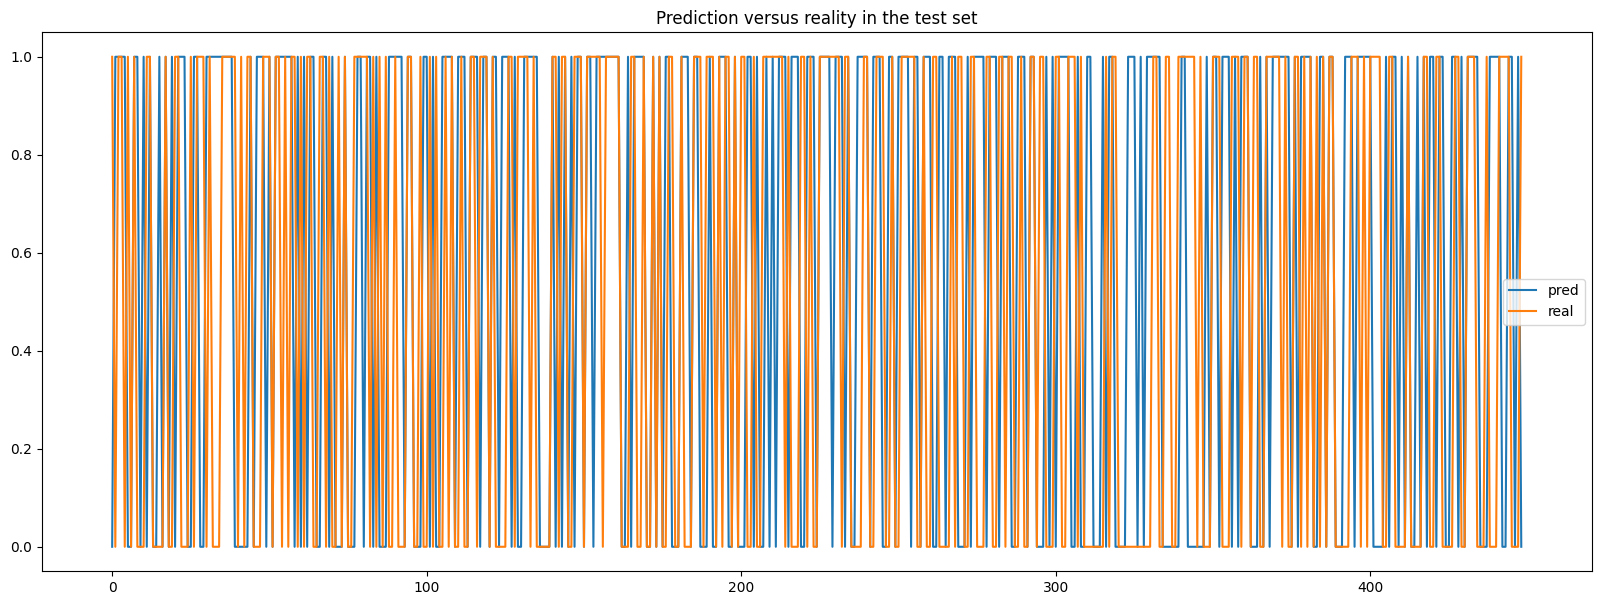

In [186]:
plt.figure(figsize=(20,7))
plt.plot(np.arange(len(y_pred)), y_pred, label='pred')
plt.plot(np.arange(len(y_test)), y_test, label='real' );
plt.title('Prediction versus reality in the test set')
plt.legend();

<Figure size 2000x700 with 0 Axes>

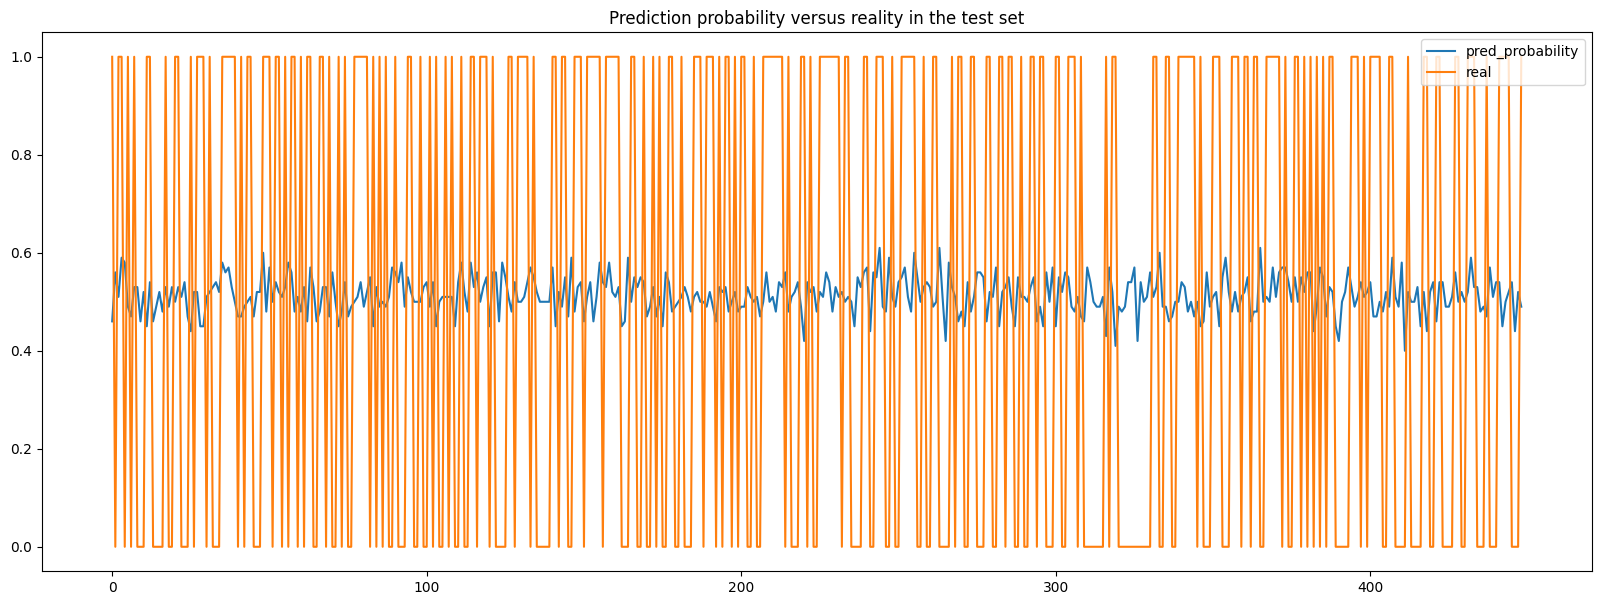

In [187]:
plt.figure(figsize=(20,7))
proba = model.predict_proba(X_test)[:,1]
plt.figure(figsize=(20,7))
plt.plot(np.arange(len(proba)), proba, label='pred_probability')
plt.plot(np.arange(len(y_test)), y_test, label='real' );
plt.title('Prediction probability versus reality in the test set');
plt.legend();
plt.show();

In [188]:
backtestdata = pd.DataFrame(index= len(X_test))

backtestdata['signal_pred'] = y_pred
backtestdata['signal_actual'] = y_test
backtestdata['Market Returns'] = X_test['Close'].diff(3)
backtestdata['Actual Returns'] = backtestdata['Market Returns'] * backtestdata['signal_actual'].shift(3)
backtestdata['Strategy Returns'] = backtestdata['Market Returns'] * backtestdata['signal_pred'].shift(3)
backtestdata=backtestdata.reset_index()
backtestdata.head()
backtestdata[['Strategy Returns','Actual Returns']].cumsum().hist()
backtestdata[['Strategy Returns','Actual Returns']].cumsum().plot()

TypeError: Index(...) must be called with a collection of some kind, 449 was passed